In [9]:
import numpy as np
import pylab as plt
from kuramoto import Kuramoto
import matplotlib.pyplot as plt
from scipy import signal
plt.ion()

In [10]:
plt.ion()

low_freq_sd = 1
low_freq_mean = 6
high_freq_mean = 40

# Defining time array
t0, t1, dt = 0, 40, 0.01
T = np.arange(t0, t1, dt)

# Y0, W, K are initial phase, intrinsic freq and
# coupling K matrix respectively
Y0 = np.random.rand(2)*2*np.pi
W = 2 * np.pi * np.array(np.random.randn(2) * low_freq_sd + low_freq_mean)

coupling=0.5
modulation=0.1
noise=0.6

W12 = coupling
W21 = coupling
K1 = np.array([[0, W12],
               [W12, 0]])
K2 = np.array([[0, W21],
               [W21, 0]])

K = np.dstack((K1, K2)).T

# Passing parameters as a dictionary
init_params = {'W': W, 'K': K, 'Y0': Y0, 'noise': 'uniform'}

# Running Kuramoto model
kuramoto = Kuramoto(init_params)
odePhi = kuramoto.solve(T)

# Computing phase dynamics
phaseDynamics = np.diff(odePhi)/dt

low_fb = np.sin(odePhi)
high_fb = np.vstack((np.sin(T * 2 * np.pi * high_freq_mean) * ((1-modulation) + (modulation * low_fb[0])) + np.random.randn(4000)*noise,
                        np.sin(T * 2 * np.pi * high_freq_mean) * ((1-modulation) + (modulation * low_fb[1])) + np.random.randn(4000)*noise))


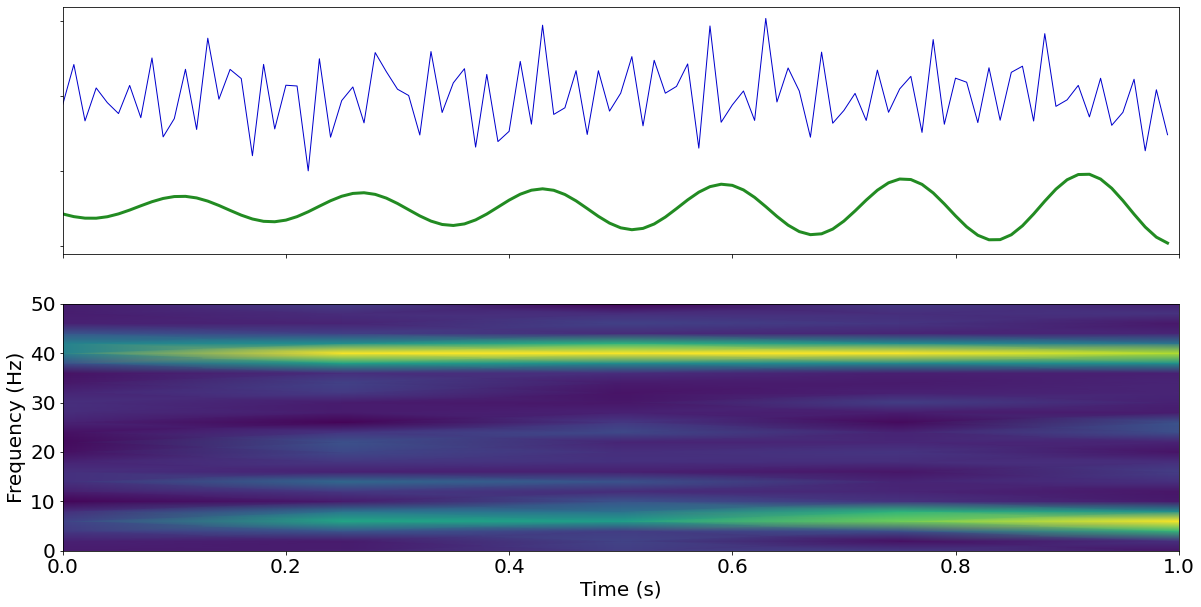

In [11]:

# plot simu
times = np.arange(0,4000,1)
gamma = np.mean(high_fb, axis=0)
theta = np.mean(low_fb, axis=0)

# 
data = low_fb + high_fb
f, t, Z = signal.stft(np.mean(data, axis=0), 100, nperseg=50)

plt.rcParams.update({'font.size': 20})


fig, axs = plt.subplots(2, sharex=True, figsize=(20,10))
axs[0].plot(times[0:100]/100, gamma[0:100], color='mediumblue', linewidth=1)
axs[0].plot(times[0:100]/100, (theta[0:100]-3), color='forestgreen', linewidth=3)
axs[0].set_yticklabels([])

axs[1].pcolormesh(t[0:5], f, np.abs(Z[:,0:5]), vmin=0, vmax=0.5, shading='gouraud')
axs[1].set_ylabel('Frequency (Hz)')
axs[1].set_xlabel('Time (s)')

plt.show()

